In [1]:
##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
df = pd.read_csv("petfinder-mini.csv")

In [3]:
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,been at my place for a while..am hoping to fin...,0,4
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1 month old white + grey kitten for adoption n...,1,3
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,ooooo,1,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,she is very shy..adventures and independent..s...,3,4


In [6]:
df['AdoptionSpeed'].value_counts()

AdoptionSpeed
2    3153
4    3080
3    2543
1    2432
0     329
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           11537 non-null  object
 1   Age            11537 non-null  int64 
 2   Breed1         11537 non-null  object
 3   Gender         11537 non-null  object
 4   Color1         11537 non-null  object
 5   Color2         11537 non-null  object
 6   MaturitySize   11537 non-null  object
 7   FurLength      11537 non-null  object
 8   Vaccinated     11537 non-null  object
 9   Sterilized     11537 non-null  object
 10  Health         11537 non-null  object
 11  Fee            11537 non-null  int64 
 12  Description    11528 non-null  object
 13  PhotoAmt       11537 non-null  int64 
 14  AdoptionSpeed  11537 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()

Type             0
Age              0
Breed1           0
Gender           0
Color1           0
Color2           0
MaturitySize     0
FurLength        0
Vaccinated       0
Sterilized       0
Health           0
Fee              0
Description      9
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

In [9]:
df.shape

(11537, 15)

In [10]:
df.head(2)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0


In [11]:
df['Type'].value_counts()

Type
Dog    6601
Cat    4936
Name: count, dtype: int64

In [15]:
for col in df.columns:
    print('==================')
    print(df[col].value_counts())
    

Type
Dog    6601
Cat    4936
Name: count, dtype: int64
Age
2      2522
3      1500
1      1415
4       888
12      833
       ... 
135       1
44        1
92        1
74        1
100       1
Name: count, Length: 105, dtype: int64
Breed1
Mixed Breed             4629
Domestic Short Hair     2605
Domestic Medium Hair     865
Tabby                    242
Domestic Long Hair       223
                        ... 
Bedlington Terrier         1
American Bulldog           1
Rhodesian Ridgeback        1
Setter                     1
Dutch Shepherd             1
Name: count, Length: 166, dtype: int64
Gender
Female    6466
Male      5071
Name: count, dtype: int64
Color1
Black     5241
Brown     3075
Golden     789
Cream      765
White      593
Gray       575
Yellow     499
Name: count, dtype: int64
Color2
No Color    3968
White       2920
Brown       2203
Cream        788
Gray         659
Yellow       535
Golden       464
Name: count, dtype: int64
MaturitySize
Medium    8016
Small     2480
Large    

In [16]:
categorical_list = []

numerical_list = []

for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_list.append(col)
    else:
        numerical_list.append(col)
        
        

In [17]:
categorical_list, numerical_list

(['Type',
  'Breed1',
  'Gender',
  'Color1',
  'Color2',
  'MaturitySize',
  'FurLength',
  'Vaccinated',
  'Sterilized',
  'Health',
  'Description'],
 ['Age', 'Fee', 'PhotoAmt', 'AdoptionSpeed'])

In [19]:
df_numerical = df[numerical_list]
df_numerical

,Age,Fee,PhotoAmt,AdoptionSpeed
0,3,100,1,2
1,1,0,2,0
2,1,0,7,3
3,4,150,8,2
4,1,0,3,2
...,...,...,...,...
11532,24,0,0,4
11533,1,0,1,3
11534,6,0,1,0
11535,9,0,3,4


In [20]:
df_numerical.corr()

,Age,Fee,PhotoAmt,AdoptionSpeed
Age,1.000000,0.086637,-0.063674,0.114142
Fee,0.086637,1.000000,0.019387,-0.006643
PhotoAmt,-0.063674,0.019387,1.000000,-0.023183
AdoptionSpeed,0.114142,-0.006643,-0.023183,1.000000


<Axes: >

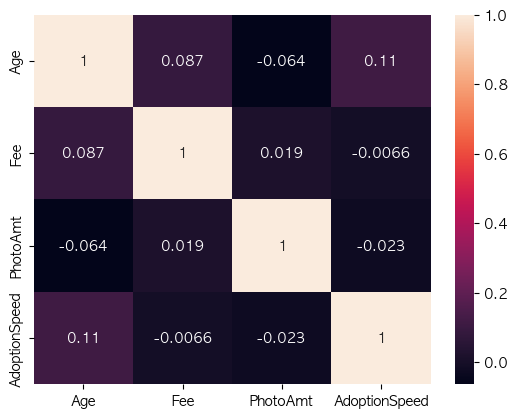

In [22]:
sns.heatmap(df_numerical.corr(), annot=True)

In [23]:
df.describe()

,Age,Fee,PhotoAmt,AdoptionSpeed
count,11537.000000,11537.000000,11537.000000,11537.000000
mean,11.743434,23.957268,3.610211,2.486522
std,19.324221,80.024226,3.145872,1.173275
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,2.000000
50%,4.000000,0.000000,3.000000,2.000000
75%,12.000000,0.000000,5.000000,4.000000
max,255.000000,2000.000000,30.000000,4.000000


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Fee'}>],
       [<Axes: title={'center': 'PhotoAmt'}>,
        <Axes: title={'center': 'AdoptionSpeed'}>]], dtype=object)

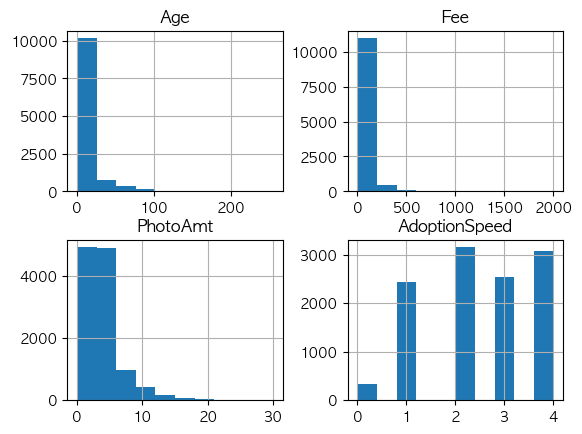

In [25]:
df_numerical.hist()

In [27]:
df[df['Age'] > 50]

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
13,Dog,78,Terrier,Male,Black,White,Medium,Medium,Not Sure,Not Sure,Healthy,0,We moved out of our apartment to a landed home...,2,4
35,Dog,72,Mixed Breed,Female,Brown,White,Medium,Short,Yes,Yes,Healthy,0,"She is a calm, gentle, good-mannered, friendly...",3,4
36,Cat,60,Domestic Long Hair,Male,Black,Brown,Large,Long,Yes,Yes,Healthy,0,Hi... I have one long haired adult male cat fo...,3,2
45,Dog,60,Mixed Breed,Female,Brown,Cream,Medium,Short,No,Yes,Healthy,0,Milky was dump ard our area for more than half...,2,4
50,Dog,62,Mixed Breed,Male,Black,Golden,Medium,Medium,Yes,Yes,Healthy,0,Jasz is a very friendly and well-behaved Schna...,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327,Cat,108,Domestic Short Hair,Female,Black,White,Medium,Short,Yes,Yes,Healthy,0,"My name Chan Kok Wai, a 66 year old man who ha...",1,3
11333,Dog,60,Miniature Pinscher,Male,Brown,No Color,Small,Short,Not Sure,No,Minor Injury,0,Abandoned by owner. Minor Skin problem No cagi...,1,2
11371,Cat,51,Domestic Short Hair,Male,Golden,Yellow,Medium,Short,Yes,Yes,Healthy,0,Febee came to my doorstep when he was about 4 ...,1,4
11393,Dog,96,Shih Tzu,Female,Cream,White,Small,Medium,Yes,Not Sure,Healthy,0,ONLY FOR KLANG VALLEY Fluffy is looking for a ...,2,3


<Axes: ylabel='Age'>

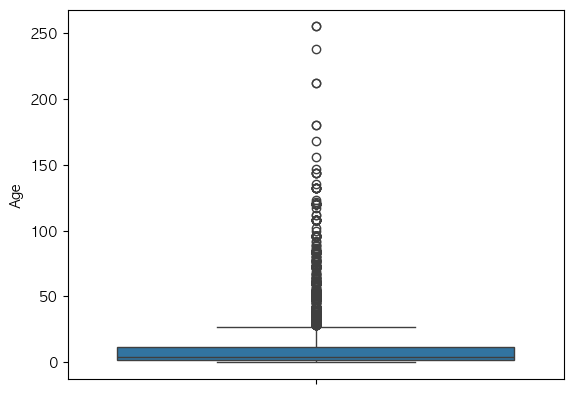

In [28]:
sns.boxplot(df_numerical['Age'])

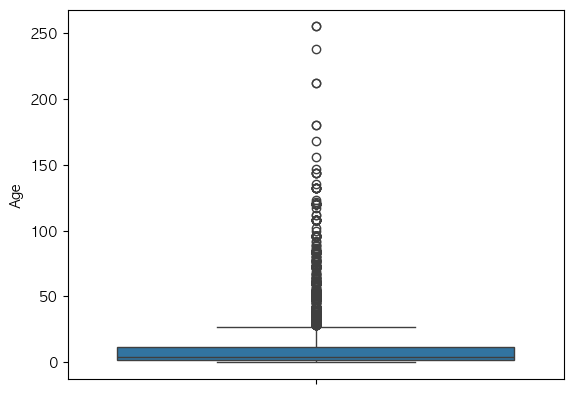

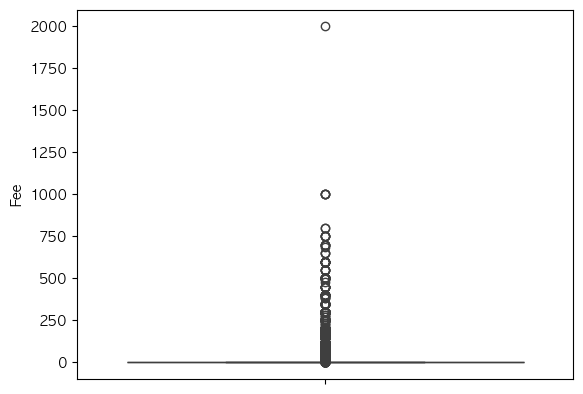

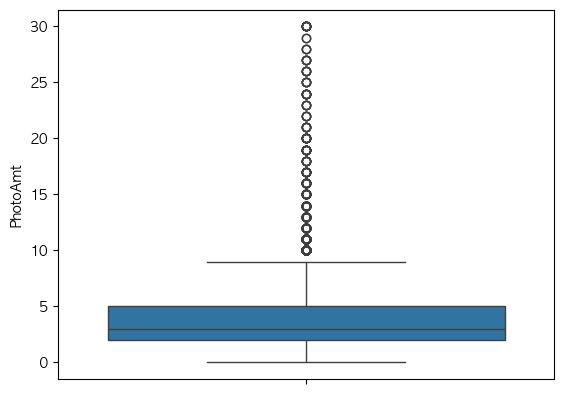

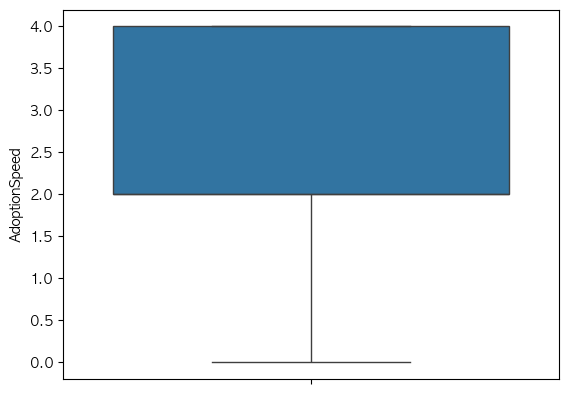

In [32]:
for col in df_numerical:
    sns.boxplot(df_numerical[col])
    plt.show()

In [37]:
df[df['Fee'] > 30]

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
6,Cat,12,Domestic Long Hair,Male,Black,No Color,Medium,Long,No,Not Sure,Healthy,300,anyone within the area of ipoh or taiping who ...,3,1
10,Cat,3,Domestic Long Hair,Female,Black,Brown,Large,Long,Yes,No,Healthy,50,Kali is a super playful kitten who is on the g...,2,1
37,Cat,6,Domestic Short Hair,Male,Black,Brown,Medium,Short,Yes,Yes,Healthy,100,Personality:Shy at first but will sit next to ...,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11485,Dog,48,Maltese,Female,Cream,White,Small,Long,Yes,Not Sure,Healthy,299,This maltase used to belong to a breeder. Then...,2,4
11498,Cat,2,Domestic Short Hair,Female,Black,Yellow,Medium,Short,No,No,Healthy,50,Dania is a female kitten very active and love ...,3,2
11503,Dog,3,Mixed Breed,Female,Brown,No Color,Medium,Medium,Yes,No,Healthy,200,A RM deposit will be collected upon adoption. ...,3,2
11506,Dog,24,Mixed Breed,Female,Cream,White,Medium,Medium,Yes,Yes,Healthy,350,Whisky is a Jack Russell Terrier mix. She is r...,4,2


In [46]:
df_numerical.groupby('AdoptionSpeed')['Age'].mean()

AdoptionSpeed
0    11.617021
1     9.332237
2     9.936251
3    11.468344
4    15.737987
Name: Age, dtype: float64

In [50]:
for col in df_numerical.columns:
    if col != 'AdoptionSpeed':
        print(df_numerical.groupby('AdoptionSpeed')[col].mean())


AdoptionSpeed
0    11.617021
1     9.332237
2     9.936251
3    11.468344
4    15.737987
Name: Age, dtype: float64
AdoptionSpeed
0    26.501520
1    24.701480
2    24.582937
3    21.783327
4    24.252273
Name: Fee, dtype: float64
AdoptionSpeed
0    3.240122
1    3.457648
2    3.736759
3    4.313803
4    3.059740
Name: PhotoAmt, dtype: float64


In [51]:
df_numerical

,Age,Fee,PhotoAmt,AdoptionSpeed
0,3,100,1,2
1,1,0,2,0
2,1,0,7,3
3,4,150,8,2
4,1,0,3,2
...,...,...,...,...
11532,24,0,0,4
11533,1,0,1,3
11534,6,0,1,0
11535,9,0,3,4


In [76]:
df_categorical = df[categorical_list]

In [55]:
df.head(2)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0


In [57]:
# df_categorical.drop('Description', axis=1, inplace=True)
# df_categorical['AdoptionSpeed'] = df['AdoptionSpeed']

In [58]:
df_categorical

,Type,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,AdoptionSpeed
0,Cat,Tabby,Male,Black,White,Small,Short,No,No,Healthy,2
1,Cat,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0
2,Dog,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,3
3,Dog,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,2
4,Dog,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,2
...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,4
11533,Cat,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,3
11534,Dog,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0
11535,Cat,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,4


Type
Dog    6601
Cat    4936
Name: count, dtype: int64


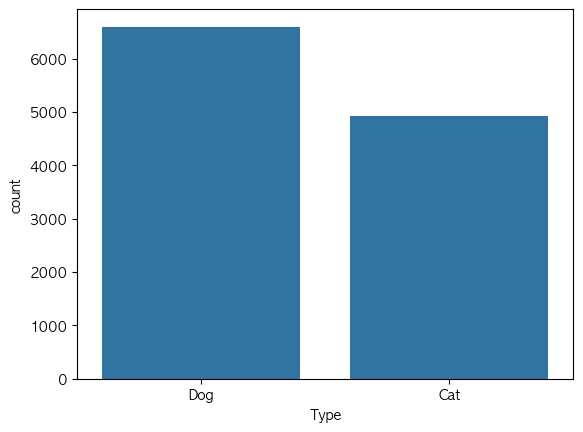

Breed1
Mixed Breed             4629
Domestic Short Hair     2605
Domestic Medium Hair     865
Tabby                    242
Domestic Long Hair       223
                        ... 
Cattle Dog                 1
Manchester Terrier         1
Spaniel                    1
Lancashire Heeler          1
Dutch Shepherd             1
Name: count, Length: 166, dtype: int64


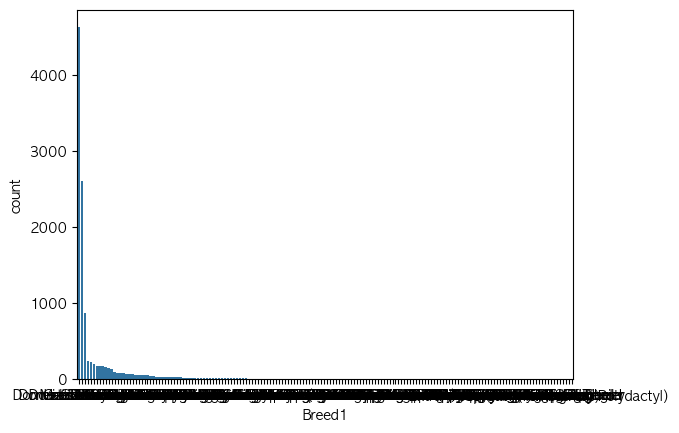

Gender
Female    6466
Male      5071
Name: count, dtype: int64


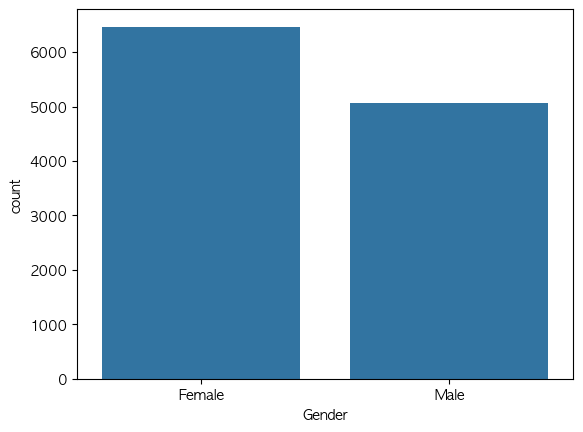

Color1
Black     5241
Brown     3075
Golden     789
Cream      765
White      593
Gray       575
Yellow     499
Name: count, dtype: int64


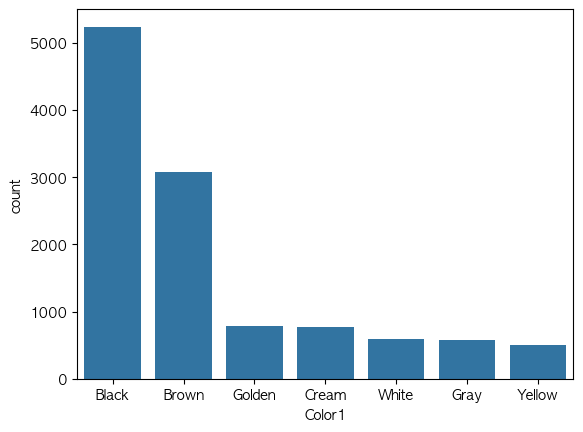

Color2
No Color    3968
White       2920
Brown       2203
Cream        788
Gray         659
Yellow       535
Golden       464
Name: count, dtype: int64


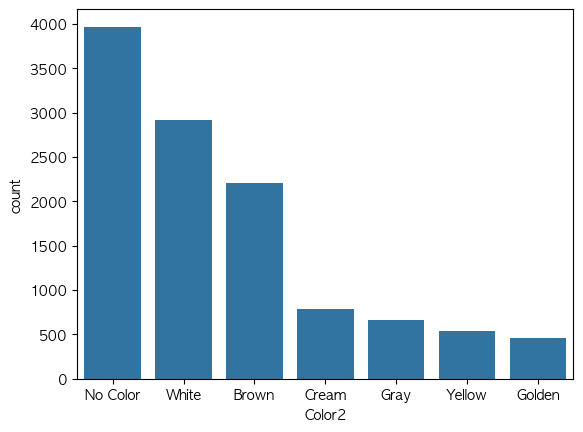

MaturitySize
Medium    8016
Small     2480
Large     1041
Name: count, dtype: int64


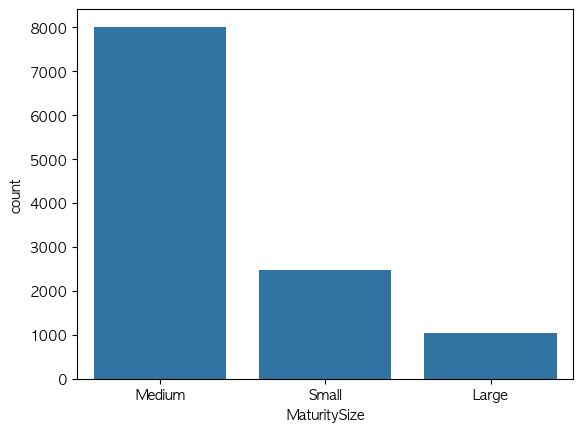

FurLength
Short     6676
Medium    4152
Long       709
Name: count, dtype: int64


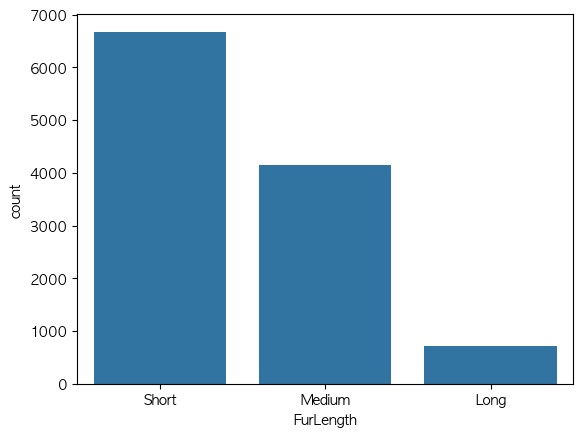

Vaccinated
Yes         5060
No          4962
Not Sure    1515
Name: count, dtype: int64


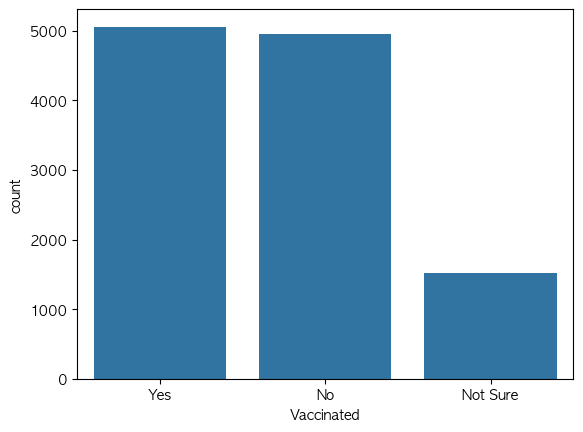

Sterilized
No          7497
Yes         2697
Not Sure    1343
Name: count, dtype: int64


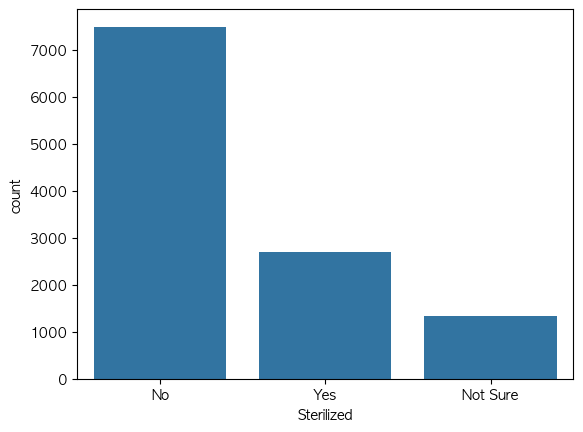

Health
Healthy           11098
Minor Injury        409
Serious Injury       30
Name: count, dtype: int64


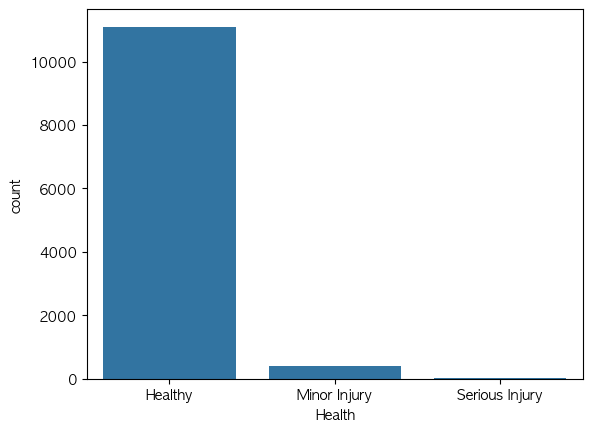

AdoptionSpeed
2    3153
4    3080
3    2543
1    2432
0     329
Name: count, dtype: int64


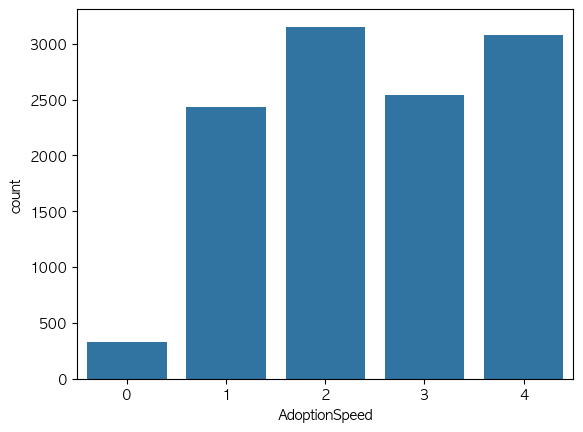

In [61]:
for col in df_categorical.columns:
    print('============================================')
    print(df[col].value_counts().sort_values(ascending=False))
    sns.barplot(x=df[col].value_counts().sort_values(ascending=False).index, y=df[col].value_counts().sort_values(ascending=False))
    plt.show()

In [67]:
df_categorical_encoder = df_categorical
df_categorical_encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
df_categorical_encoder.columns

Index(['Type', 'Breed1', 'Gender', 'Color1', 'Color2', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'AdoptionSpeed'],
      dtype='object')

In [70]:
df_categorical_encoder.drop('AdoptionSpeed', axis=1, inplace=True)

In [73]:
for col in df_categorical_encoder.columns:
    df_categorical_encoder[col] = le.fit_transform(df_categorical_encoder[col])

In [78]:
df.head(2)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0


In [79]:
df_categorical['AdoptionSpeed'] = df['AdoptionSpeed']

In [80]:
df_categorical

,Type,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Description,AdoptionSpeed
0,Cat,Tabby,Male,Black,White,Small,Short,No,No,Healthy,Nibble is a 3+ month old ball of cuteness. He ...,2
1,Cat,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,I just found it alone yesterday near my apartm...,0
2,Dog,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,Their pregnant mother was dumped by her irresp...,3
3,Dog,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,"Good guard dog, very alert, active, obedience ...",2
4,Dog,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,This handsome yet cute boy is up for adoption....,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,been at my place for a while..am hoping to fin...,4
11533,Cat,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,1 month old white + grey kitten for adoption n...,3
11534,Dog,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,ooooo,0
11535,Cat,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,she is very shy..adventures and independent..s...,4


In [82]:
df_categorical_encoder['AdoptionSpeed'] = df['AdoptionSpeed']

In [83]:
df_categorical_encoder

,Type,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,AdoptionSpeed
0,0,147,1,0,5,2,2,0,0,0,2
1,0,54,1,0,0,1,1,1,1,0,0
2,1,99,1,1,5,1,1,2,0,0,3
3,1,99,0,0,0,1,2,2,0,0,2
4,1,99,1,0,4,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
11532,1,115,1,1,2,1,1,1,0,0,4
11533,0,55,0,2,3,1,2,0,0,0,3
11534,1,126,0,0,5,2,0,2,0,0,0
11535,0,55,0,6,5,2,2,2,2,0,4


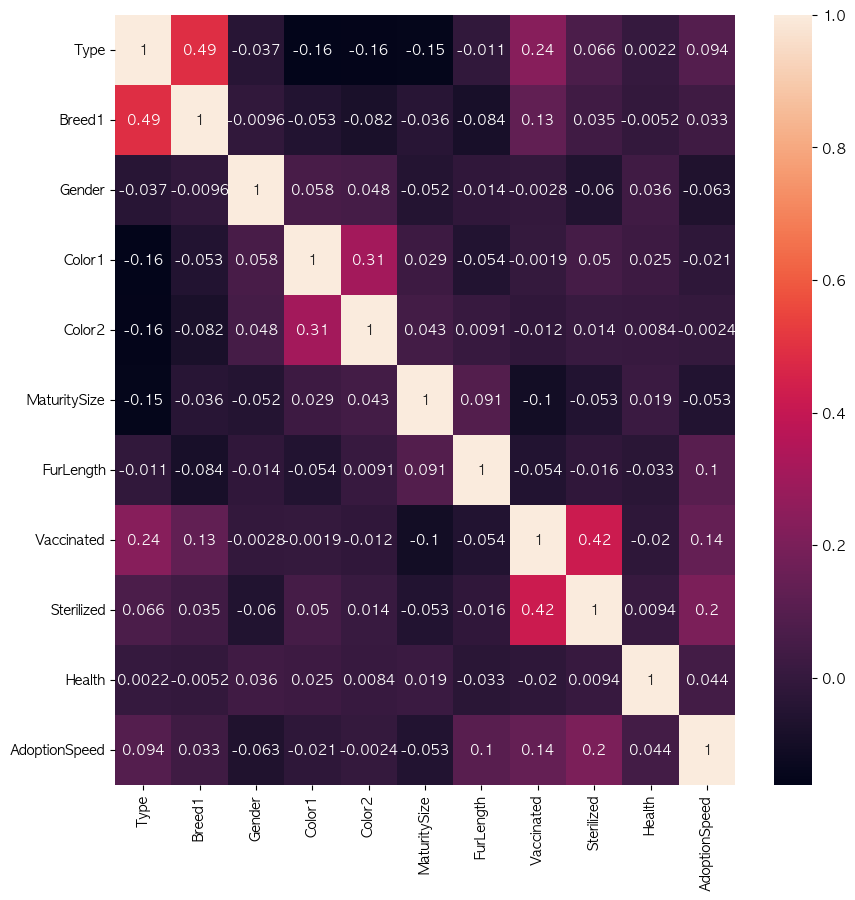

In [89]:

plt.figure(figsize=(10, 10))
sns.heatmap(df_categorical_encoder.corr(), annot=True)
plt.show()

In [92]:
df_categorical.drop('Description', axis=1, inplace=True)

In [93]:
df_categorical

,Type,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,AdoptionSpeed
0,Cat,Tabby,Male,Black,White,Small,Short,No,No,Healthy,2
1,Cat,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0
2,Dog,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,3
3,Dog,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,2
4,Dog,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,2
...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,4
11533,Cat,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,3
11534,Dog,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0
11535,Cat,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,4


In [95]:
df_categorical.groupby(['AdoptionSpeed','Type'])['Type'].count()

AdoptionSpeed  Type
0              Cat      183
               Dog      146
1              Cat     1221
               Dog     1211
2              Cat     1388
               Dog     1765
3              Cat      932
               Dog     1611
4              Cat     1212
               Dog     1868
Name: Type, dtype: int64

In [143]:
df_pivot.index.nunique()

2

In [180]:
df_check = pd.DataFrame(df_categorical.groupby(['Type', 'AdoptionSpeed'])['AdoptionSpeed'].count())
df_check.columns = ['count']
df_check = df_check.reset_index()
df_check

# df_pivot = pd.pivot_table(data=df_check,
#                           index='Type',
#                           columns = 'AdoptionSpeed',
#                           values='count')

# df_pivot['sum'] = 0
# for i in range(0, df_pivot.index.nunique()):
#     df_pivot.iloc[i,5] = df_pivot.iloc[i,:].sum()

# df_pivot

# for i in range(0, df_pivot.columns.nunique()-1):
#     df_pivot.iloc[:,i] = round((df_pivot.iloc[:,i] / df_pivot['sum'])*100,2)
    
    
# df_pivot = df_pivot.reset_index()
# df_pivot

,Type,AdoptionSpeed,count
0,Cat,0,183
1,Cat,1,1221
2,Cat,2,1388
3,Cat,3,932
4,Cat,4,1212
5,Dog,0,146
6,Dog,1,1211
7,Dog,2,1765
8,Dog,3,1611
9,Dog,4,1868


In [183]:
df_check.groupby('Type')['count'].sum()

Type
Cat    4936
Dog    6601
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='ratio'>

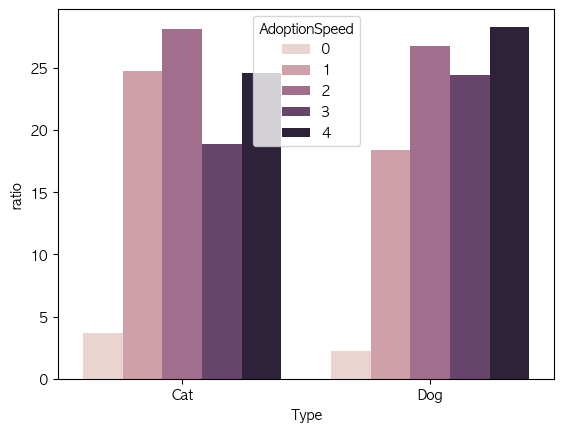

In [190]:
df_check = pd.DataFrame(df_categorical.groupby(['Type', 'AdoptionSpeed'])['AdoptionSpeed'].count())
df_check.columns = ['count']
df_check = df_check.reset_index()
df_check


df_check['sum'] = df_check['Type'].map(df_check.groupby('Type')['count'].sum())
df_check['ratio'] = round((df_check['count'] /df_check['sum'])*100,2)


sns.barplot(data=df_check, x='Type', y='ratio', hue='AdoptionSpeed')

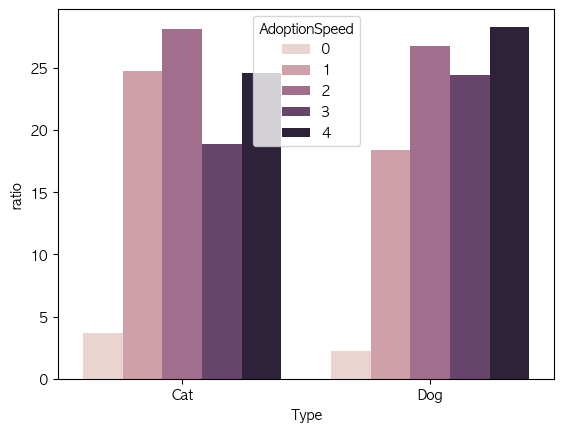

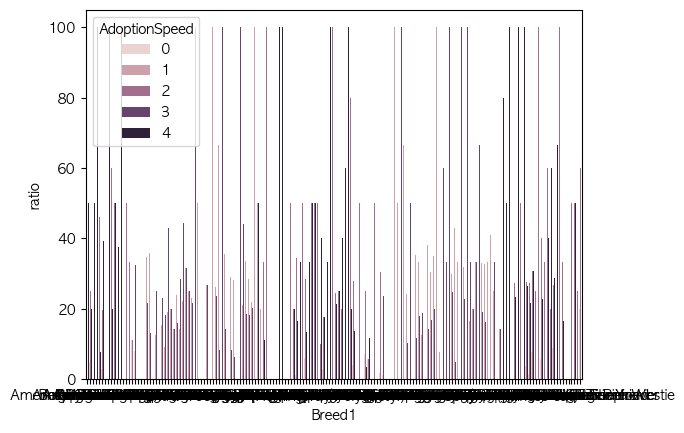

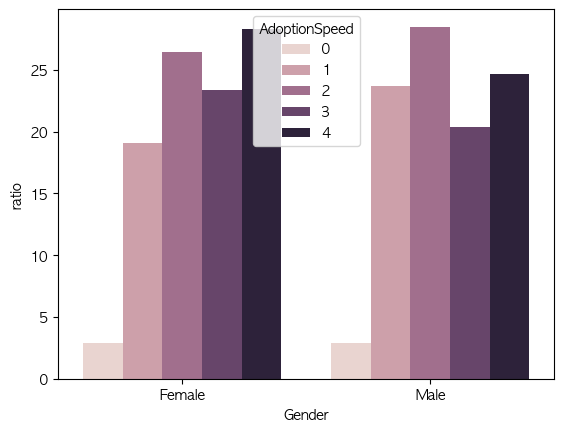

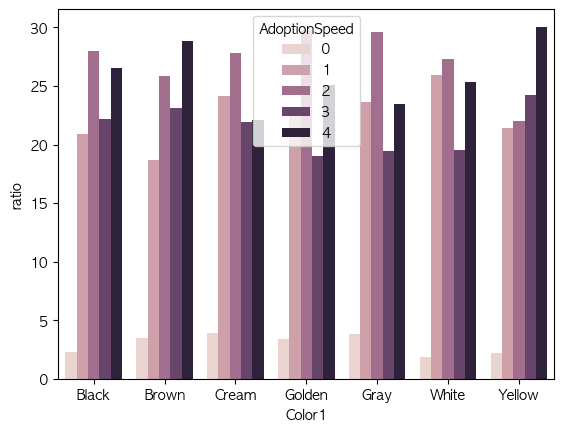

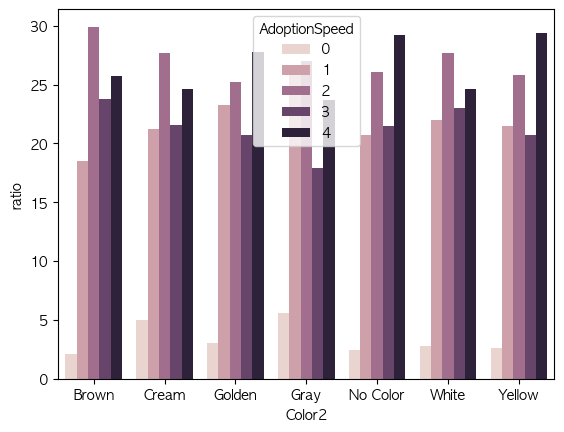

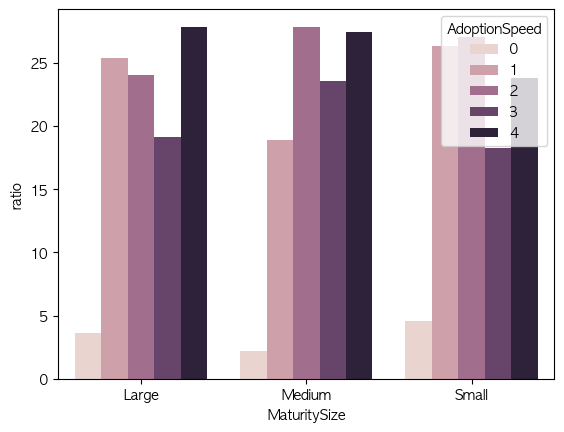

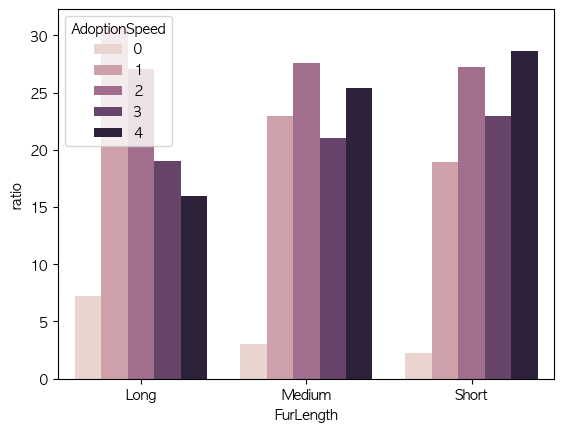

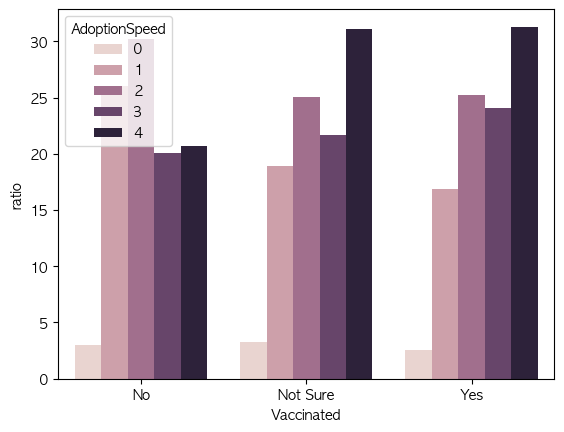

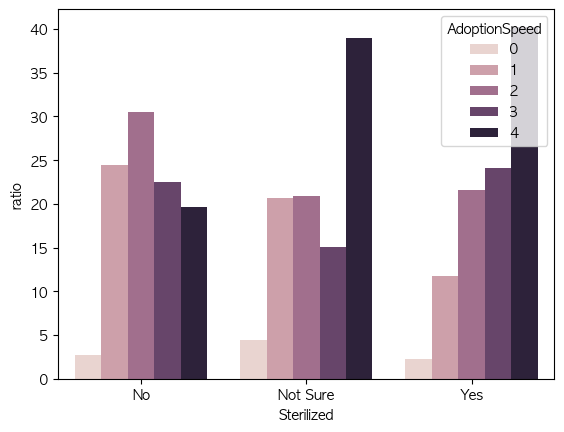

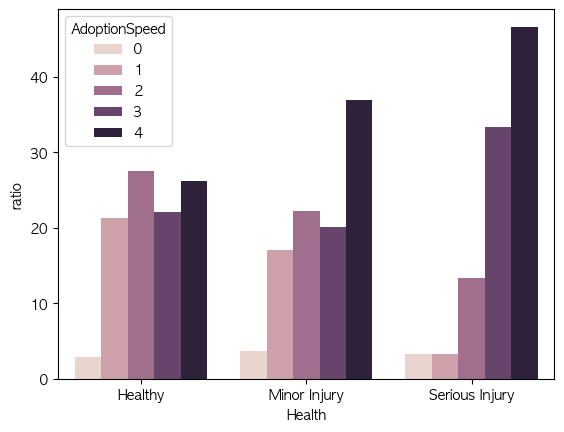

In [192]:
for col in df_categorical.columns:
    if col != 'AdoptionSpeed':
        df_check = pd.DataFrame(df_categorical.groupby([col, 'AdoptionSpeed'])['AdoptionSpeed'].count())
        df_check.columns = ['count']
        df_check = df_check.reset_index()
        df_check


        df_check['sum'] = df_check[col].map(df_check.groupby(col)['count'].sum())
        df_check['ratio'] = round((df_check['count'] /df_check['sum'])*100,2)


        sns.barplot(data=df_check, x=col, y='ratio', hue='AdoptionSpeed')    
        plt.show()

In [177]:
total_counts_by_type = df_check.groupby('Type')['count'].sum()
total_counts_by_type

Type
Cat    4936
Dog    6601
Name: count, dtype: int64

In [178]:
df_check['Type'].map(total_counts_by_type)

0    4936
1    4936
2    4936
3    4936
4    4936
5    6601
6    6601
7    6601
8    6601
9    6601
Name: Type, dtype: int64

In [193]:
df_categorical

,Type,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,AdoptionSpeed
0,Cat,Tabby,Male,Black,White,Small,Short,No,No,Healthy,2
1,Cat,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0
2,Dog,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,3
3,Dog,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,2
4,Dog,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,2
...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,4
11533,Cat,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,3
11534,Dog,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0
11535,Cat,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,4


In [207]:
df_check = pd.DataFrame(df_categorical.groupby(['AdoptionSpeed', 'Type'])['Type'].count())
df_check.columns = ['count']
df_check = df_check.reset_index()
df_check
# df_check_map = df_check.groupby('AdoptionSpeed')['count'].sum()
# df_check_map

# df_check['sum'] = df_check['AdoptionSpeed'].map(df_check_map)
# df_check['ratio'] = np.round((df_check['count'] / df_check['sum'])*100,2)
# df_check

# sns.barplot(data=df_check, x='AdoptionSpeed', y='ratio', hue=')
# plt.show()

,AdoptionSpeed,Type,count
0,0,Cat,183
1,0,Dog,146
2,1,Cat,1221
3,1,Dog,1211
4,2,Cat,1388
5,2,Dog,1765
6,3,Cat,932
7,3,Dog,1611
8,4,Cat,1212
9,4,Dog,1868


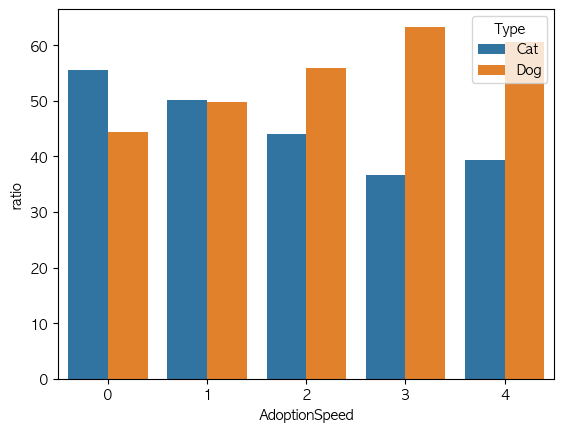

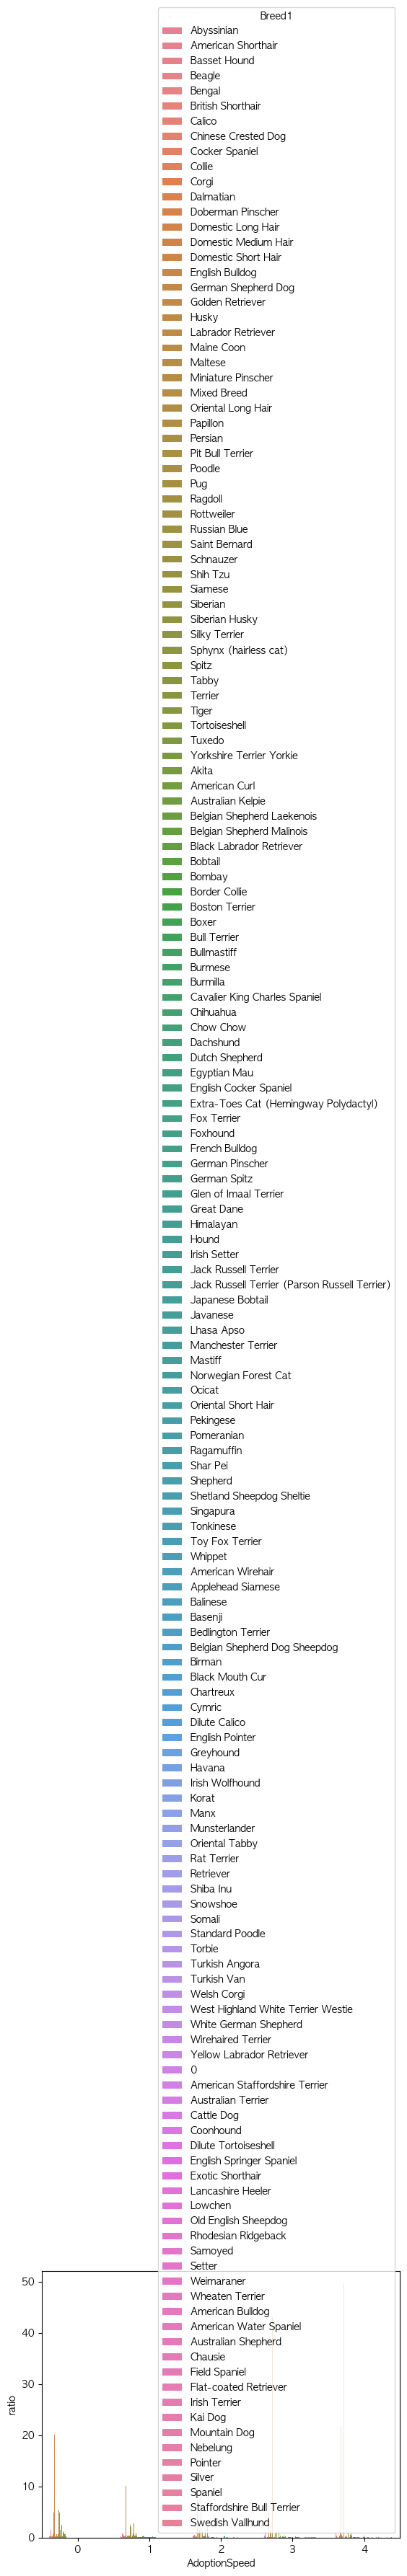

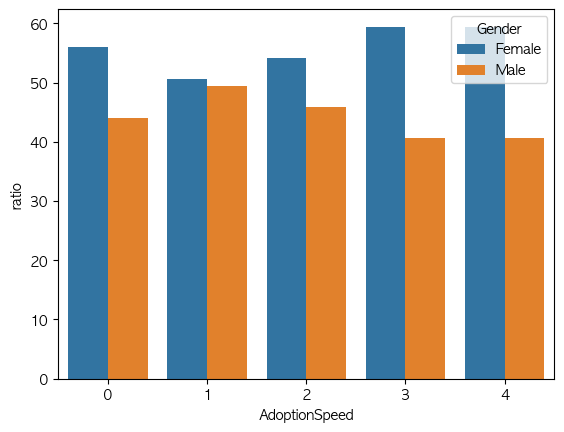

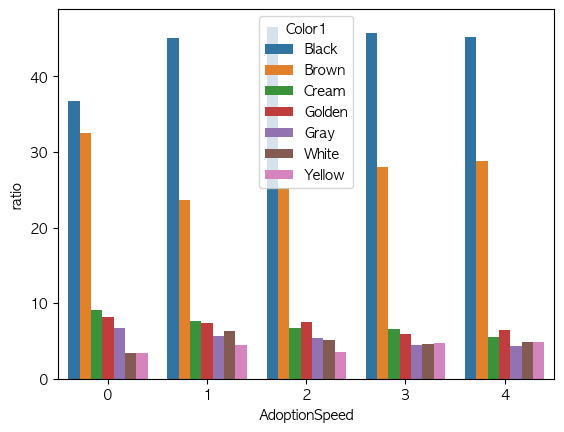

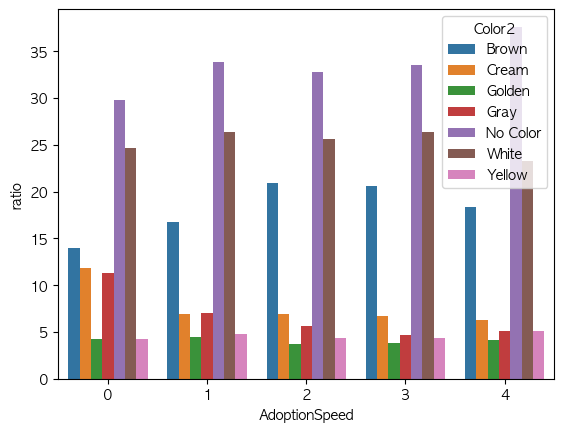

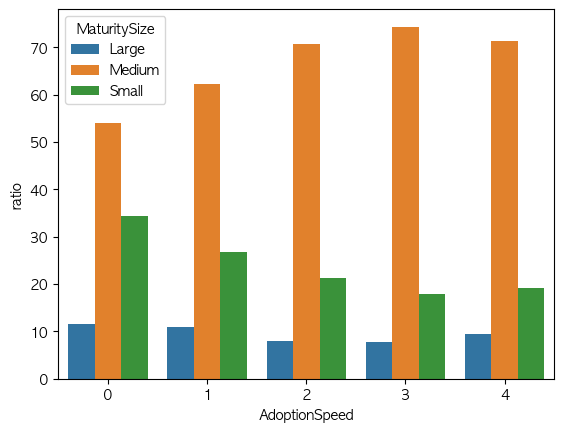

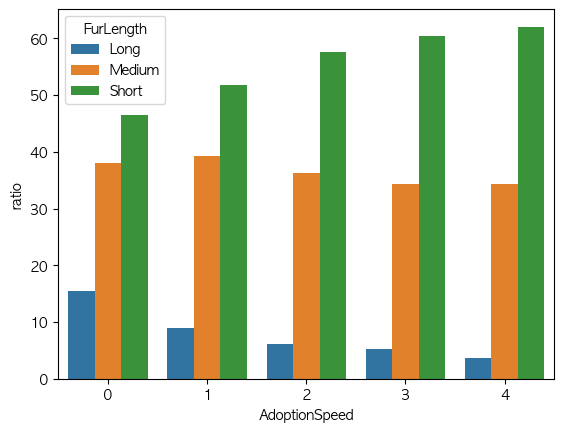

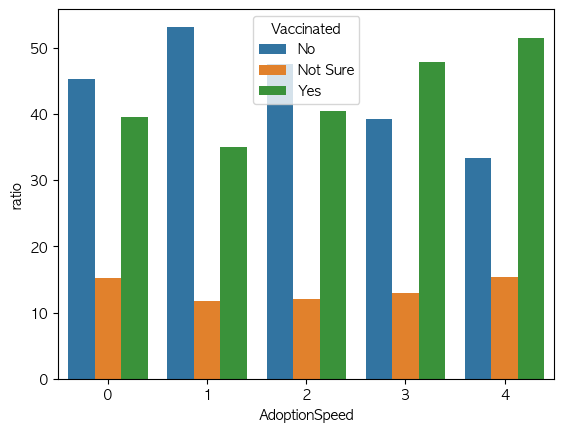

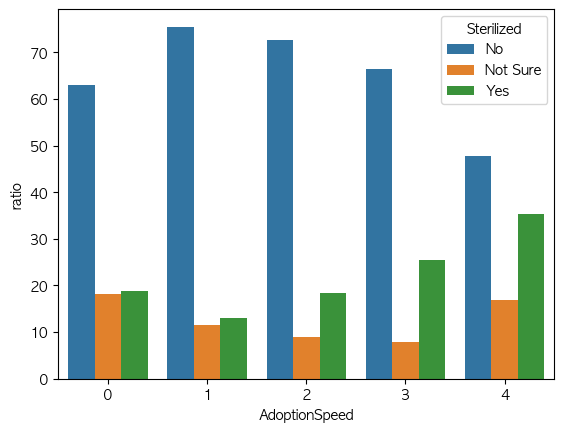

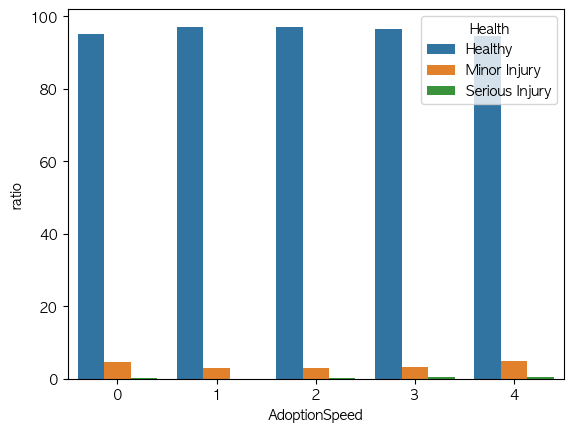

In [206]:
  for col in df_categorical.columns:  
      if col != 'AdoptionSpeed':
        df_check = pd.DataFrame(df_categorical.groupby(['AdoptionSpeed', col])[col].count())
        df_check.columns = ['count']
        df_check = df_check.reset_index()
        df_check = df.
        df_check_map = df_check.groupby('AdoptionSpeed')['count'].sum()
        df_check_map

        df_check['sum'] = df_check['AdoptionSpeed'].map(df_check_map)
        df_check['ratio'] = np.round((df_check['count'] / df_check['sum'])*100,2)
        df_check

        sns.barplot(data=df_check, x='AdoptionSpeed', y='ratio', hue=col)
        plt.show()

In [208]:
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,been at my place for a while..am hoping to fin...,0,4
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1 month old white + grey kitten for adoption n...,1,3
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,ooooo,1,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,she is very shy..adventures and independent..s...,3,4


In [211]:
df.groupby('Type')['Age'].mean().sort_values(ascending=False)

Type
Dog    14.375398
Cat     8.223663
Name: Age, dtype: float64

In [215]:
for i in df_categorical.columns:
    for j in df_numerical.columns:
        print('========================================')
        print(i, j)
        print(df.groupby(i)[j].mean().sort_values(ascending=False).head(5))
        

Type Age
Type
Dog    14.375398
Cat     8.223663
Name: Age, dtype: float64
Type Fee
Type
Dog    26.681563
Cat    20.314019
Name: Fee, dtype: float64
Type PhotoAmt
Type
Cat    3.847042
Dog    3.433116
Name: PhotoAmt, dtype: float64
Type AdoptionSpeed
Type
Dog    2.582336
Cat    2.358387
Name: AdoptionSpeed, dtype: float64
Breed1 Age
Breed1
Wheaten Terrier                  108.0
Old English Sheepdog              96.0
Staffordshire Bull Terrier        95.0
Cavalier King Charles Spaniel     90.0
Flat-coated Retriever             84.0
Name: Age, dtype: float64
Breed1 Fee
Breed1
American Bulldog    500.000000
English Bulldog     470.000000
Spaniel             300.000000
Samoyed             280.000000
Irish Setter        266.666667
Name: Fee, dtype: float64
Breed1 PhotoAmt
Breed1
Whippet                 12.0
Setter                  10.0
Cattle Dog              10.0
Field Spaniel            9.0
Old English Sheepdog     9.0
Name: PhotoAmt, dtype: float64
Breed1 AdoptionSpeed
Breed1
Field Spaniel

In [216]:
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,been at my place for a while..am hoping to fin...,0,4
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1 month old white + grey kitten for adoption n...,1,3
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,ooooo,1,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,she is very shy..adventures and independent..s...,3,4


In [224]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder




In [225]:
df.head(2)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0


In [226]:
X = df.drop(['Description', 'AdoptionSpeed'], axis=1)
Y = df['AdoptionSpeed']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)


In [229]:
categorical_list.remove('Description')
categorical_list

['Type',
 'Breed1',
 'Gender',
 'Color1',
 'Color2',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Sterilized',
 'Health']

In [234]:
categorical_list

['Type',
 'Breed1',
 'Gender',
 'Color1',
 'Color2',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Sterilized',
 'Health']

In [235]:
x_train

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt
10088,LabelEncoder(),11,Domestic Medium Hair,Female,Black,Brown,Medium,Medium,Yes,Yes,Healthy,0,16
7194,LabelEncoder(),76,Jack Russell Terrier,Female,Brown,White,Small,Short,Yes,Yes,Healthy,0,3
8093,LabelEncoder(),2,Mixed Breed,Female,Brown,No Color,Medium,Short,No,No,Healthy,0,1
6138,LabelEncoder(),60,Golden Retriever,Male,Cream,No Color,Medium,Medium,Yes,No,Healthy,0,2
9038,LabelEncoder(),2,Mixed Breed,Male,Black,Brown,Medium,Short,No,No,Minor Injury,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,LabelEncoder(),20,Mixed Breed,Male,Black,No Color,Medium,Short,Yes,No,Healthy,0,5
3322,LabelEncoder(),2,Tortoiseshell,Male,Black,Brown,Small,Medium,No,No,Healthy,0,10
8456,LabelEncoder(),12,Domestic Short Hair,Female,Golden,Gray,Medium,Short,Yes,Yes,Healthy,250,3
9764,LabelEncoder(),24,Husky,Female,Gray,White,Large,Medium,Not Sure,Yes,Minor Injury,300,3


In [239]:
le = LabelEncoder()

for col in categorical_list:
    le.fit( list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])


In [243]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

RandomForestClassifier()

In [247]:
import xgboost as xgb
import lightgbm as lgb

In [249]:
xgb_c = xgb.XGBClassifier()

xgb_c.fit(x_train, y_train)

y_pred_train = xgb_c.predict(x_train)
y_pred_test = xgb_c.predict(x_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74       227
           1       0.67      0.65      0.66      1674
           2       0.61      0.71      0.66      2186
           3       0.81      0.52      0.64      1800
           4       0.68      0.82      0.75      2188

    accuracy                           0.68      8075
   macro avg       0.75      0.66      0.69      8075
weighted avg       0.70      0.68      0.68      8075

              precision    recall  f1-score   support

           0       0.16      0.04      0.06       102
           1       0.39      0.36      0.37       758
           2       0.34      0.40      0.37       967
           3       0.34      0.22      0.27       743
           4       0.47      0.59      0.53       892

    accuracy                           0.39      3462
   macro avg       0.34      0.32      0.32      3462
weighted avg       0.38      0.39      0.38      3462



In [252]:
lgb_c = xgb.XGBClassifier()

lgb_c.fit(x_train, y_train)

y_pred_train = lgb_c.predict(x_train)
y_pred_test = lgb_c.predict(x_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74       227
           1       0.67      0.65      0.66      1674
           2       0.61      0.71      0.66      2186
           3       0.81      0.52      0.64      1800
           4       0.68      0.82      0.75      2188

    accuracy                           0.68      8075
   macro avg       0.75      0.66      0.69      8075
weighted avg       0.70      0.68      0.68      8075

              precision    recall  f1-score   support

           0       0.16      0.04      0.06       102
           1       0.39      0.36      0.37       758
           2       0.34      0.40      0.37       967
           3       0.34      0.22      0.27       743
           4       0.47      0.59      0.53       892

    accuracy                           0.39      3462
   macro avg       0.34      0.32      0.32      3462
weighted avg       0.38      0.39      0.38      3462



In [254]:
from sklearn.svm import SVC


In [257]:
svc_c = SVC()

svc_c.fit(x_train, y_train)
y_pred_train = svc_c.predict(x_train)
y_pred_test = svc_c.predict(x_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       227
           1       0.23      0.00      0.01      1674
           2       0.30      0.78      0.43      2186
           3       0.40      0.01      0.03      1800
           4       0.41      0.44      0.43      2188

    accuracy                           0.33      8075
   macro avg       0.27      0.25      0.18      8075
weighted avg       0.33      0.33      0.24      8075

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.00      0.00      0.00       758
           2       0.30      0.76      0.43       967
           3       0.16      0.00      0.01       743
           4       0.37      0.43      0.40       892

    accuracy                           0.32      3462
   macro avg       0.17      0.24      0.17      3462
weighted avg       0.21      0.32      0.23      3462



In [261]:
from sklearn.neighbors import KNeighborsClassifier
kn_c = KNeighborsClassifier()



.fit(x_train, y_train)
y_pred_train = .predict(x_train)
y_pred_test = .predict(x_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.40      0.25      0.31       227
           1       0.50      0.65      0.57      1674
           2       0.52      0.58      0.55      2186
           3       0.55      0.43      0.48      1800
           4       0.65      0.56      0.60      2188

    accuracy                           0.55      8075
   macro avg       0.52      0.50      0.50      8075
weighted avg       0.55      0.55      0.55      8075

              precision    recall  f1-score   support

           0       0.09      0.05      0.06       102
           1       0.31      0.40      0.35       758
           2       0.31      0.33      0.32       967
           3       0.28      0.22      0.24       743
           4       0.42      0.40      0.41       892

    accuracy                           0.33      3462
   macro avg       0.28      0.28      0.28      3462
weighted avg       0.33      0.33      0.33      3462



In [264]:
from sklearn.naive_bayes import GaussianNB
nb_c = GaussianNB()



nb_c.fit(x_train, y_train)
y_pred_train = nb_c.predict(x_train)
y_pred_test = nb_c.predict(x_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.07      0.01      0.02       227
           1       0.28      0.57      0.37      1674
           2       0.31      0.24      0.27      2186
           3       0.38      0.10      0.16      1800
           4       0.42      0.45      0.43      2188

    accuracy                           0.33      8075
   macro avg       0.29      0.28      0.25      8075
weighted avg       0.34      0.33      0.31      8075

              precision    recall  f1-score   support

           0       0.03      0.01      0.02       102
           1       0.29      0.55      0.38       758
           2       0.31      0.25      0.27       967
           3       0.40      0.12      0.18       743
           4       0.39      0.43      0.41       892

    accuracy                           0.33      3462
   macro avg       0.28      0.27      0.25      3462
weighted avg       0.34      0.33      0.30      3462



In [285]:
from tensorflow import keras
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)

loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)


y_pred_train_proba = model.predict(x_train)
y_pred_test_proba = model.predict(x_test)


# 훈련 데이터에 대한 예측 클래스 추출
y_pred_train = np.argmax(y_pred_train_proba, axis=1)
# 테스트 데이터에 대한 예측 클래스 추출
y_pred_test = np.argmax(y_pred_test_proba, axis=1)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.3518 - loss: 1.4376
1.4618557691574097
0.3503755033016205
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       227
           1       0.37      0.10      0.16      1674
           2       0.34      0.47      0.40      2186
           3       0.29      0.06      0.10      1800
           4       0.39      0.76      0.52      2188

    accuracy                           0.37      8075
   macro avg       0.28      0.28      0.23      8075
weighted avg       0.34      0.37      0.30      8075

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.40      0.09      0.15       758
           2       0.34      0.44      0.38       967
           3       0.27      0.05      0.09       743
           4       0.36      0.75      